Confusion Matrix:
 [[66  2]
 [ 4 28]]


/tmp/ipykernel_29/301472961.py:57: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  mtp.scatter(x_set[y_set == j, 0], x_set[y_set == j, 1],


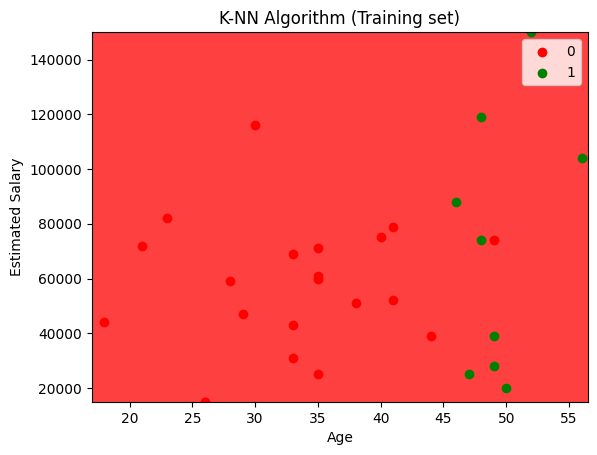

/tmp/ipykernel_29/301472961.py:82: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  mtp.scatter(x_set[y_set == j, 0], x_set[y_set == j, 1],


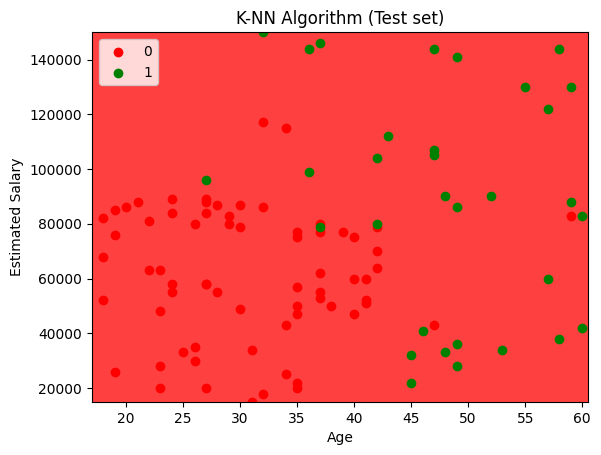

In [1]:
# Importing the libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as mtp
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
from matplotlib.colors import ListedColormap

# Importing the dataset
data_set = pd.read_csv("/kaggle/input/social-network-ads/Social_Network_Ads.csv")

# Extracting the independent and dependent variables (fixing column index)
x = data_set.iloc[:, [0, 1]].values
y = data_set.iloc[:, [2]].values

# Splitting the dataset into training and test datasets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=0)

# Use the first 1000 samples for training (or modify for a smaller sample)
x_train_sample = x_train[::10]
y_train_sample = y_train[::10]

# Feature scaling
st_x = StandardScaler()
x_train_scaled = st_x.fit_transform(x_train_sample)
x_test_scaled = st_x.transform(x_test)  # Use transform instead of fit_transform for test data

# Fitting the training dataset into K-NN classifier model
classifier = KNeighborsClassifier(n_neighbors=5, metric="minkowski", p=2)
classifier.fit(x_train_scaled, y_train_sample.ravel())  # Use ravel() to flatten y

# Predicting the test set result
y_pred = classifier.predict(x_test_scaled)

# Creating the confusion matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", cm)

# Visualizing the training set result
x_set, y_set = x_train_sample, y_train_sample.ravel()  # Flatten y_set
x1, x2 = np.meshgrid(np.arange(start=x_set[:, 0].min() - 1, stop=x_set[:, 0].max() + 1, step=0.5),
                     np.arange(start=x_set[:, 1].min() - 1, stop=x_set[:, 1].max() + 1, step=0.5))

# Predicting over the meshgrid
grid_predictions = classifier.predict(np.array([x1.ravel(), x2.ravel()]).T)
grid_predictions = grid_predictions.reshape(x1.shape)

# Plot the decision boundary using contourf
mtp.contourf(x1, x2, grid_predictions, alpha=0.75, cmap=ListedColormap(('red', 'green')))
mtp.xlim(x1.min(), x1.max())
mtp.ylim(x2.min(), x2.max())

# Plot the training points
for i, j in enumerate(np.unique(y_set)):
    mtp.scatter(x_set[y_set == j, 0], x_set[y_set == j, 1], 
                c=ListedColormap(('red', 'green'))(i), label=j)

mtp.title('K-NN Algorithm (Training set)')
mtp.xlabel('Age')
mtp.ylabel('Estimated Salary')
mtp.legend()
mtp.show()

# Visualizing the test set result
x_set, y_set = x_test, y_test.ravel()  # Flatten y_set
x1, x2 = np.meshgrid(np.arange(start=x_set[:, 0].min() - 1, stop=x_set[:, 0].max() + 1, step=0.5),
                     np.arange(start=x_set[:, 1].min() - 1, stop=x_set[:, 1].max() + 1, step=0.5))

# Predicting over the meshgrid
grid_predictions = classifier.predict(np.array([x1.ravel(), x2.ravel()]).T)
grid_predictions = grid_predictions.reshape(x1.shape)

# Plot the decision boundary using contourf
mtp.contourf(x1, x2, grid_predictions, alpha=0.75, cmap=ListedColormap(('red', 'green')))
mtp.xlim(x1.min(), x1.max())
mtp.ylim(x2.min(), x2.max())

# Plot the test points
for i, j in enumerate(np.unique(y_set)):
    mtp.scatter(x_set[y_set == j, 0], x_set[y_set == j, 1], 
                c=ListedColormap(('red', 'green'))(i), label=j)

mtp.title('K-NN Algorithm (Test set)')
mtp.xlabel('Age')
mtp.ylabel('Estimated Salary')
mtp.legend()
mtp.show()
